In [50]:
import os

import pandas as pd

In [51]:
def print_distribution(name, samples):
    data = pd.read_csv(os.path.join(data_dir, '{}.csv'.format(name)), header=None)
    distribution = dict()
    for index, row in samples.iterrows():
        indices = row.values.tolist()
        classes = data.iloc[indices, -1].value_counts()
        for class_name, class_dist in classes.iteritems():
            if class_name not in distribution:
                distribution[class_name] = 0
            distribution[class_name] += class_dist
    total = sum(distribution.values())
    
    org_distribution = dict()
    df = data.iloc[:,-1].value_counts()
    for class_name, class_dist in df.iteritems():
        if class_name not in org_distribution:
            org_distribution[class_name] = 0
        org_distribution[class_name] += class_dist * n
    
    df1 = pd.DataFrame(distribution, index=['sampled'])
    df2 = pd.DataFrame(org_distribution, index=['original'])
    df = pd.concat([df1, df2])
    df.plot.barh(stacked=True, title=name)
    
    print('{} {} Total across samples: {} Total in dataset: {} Ratio: {:.0f}/{}'.format(name, distribution, total, data.shape[0], total/data.shape[0], n))

In [52]:
n = 10  #number of bootstrap samples per dataset

In [53]:
data_dir = os.path.join('..', 'data', 'ordinal', 'csv')

# Weights set to 1.0

In [54]:
sampling_dir = os.path.join('..', 'results', 'sampling')
samples_by_dataset = dict()
for file in os.listdir(sampling_dir):
    path = os.path.join(sampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    samples_by_dataset[name] = df

housing {4: 1266, 2: 1247, 3: 1302, 1: 1245} Total across samples: 5060 Total in dataset: 506 Ratio: 10/10
ERA_n {3: 1812, 4: 1707, 5: 1604, 2: 1441, 6: 1130, 7: 881, 1: 901, 8: 332, 9: 192} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
breast-w {'benign': 4654, 'malignant': 2336} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
ESL_n {6: 1338, 5: 1094, 4: 1016, 7: 626, 3: 402, 8: 219, 2: 131, 1: 16, 9: 38} Total across samples: 4880 Total in dataset: 488 Ratio: 10/10
dataset3 {3: 3645, 2: 2915, 4: 3113, 1: 2393, 5: 1214} Total across samples: 13280 Total in dataset: 1328 Ratio: 10/10
windsor {1: 1348, 2: 1388, 0: 1391, 3: 1333} Total across samples: 5460 Total in dataset: 546 Ratio: 10/10
balance_scale {'L': 2963, 'R': 2789, 'B': 498} Total across samples: 6250 Total in dataset: 625 Ratio: 10/10
breast-w_nm {'benign': 4533, 'malignant': 2457} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
LEV_n {2: 4082, 1: 2796, 3: 1945, 0: 892, 4: 285} T

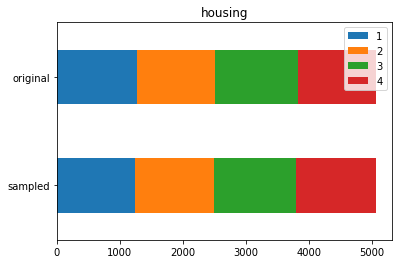

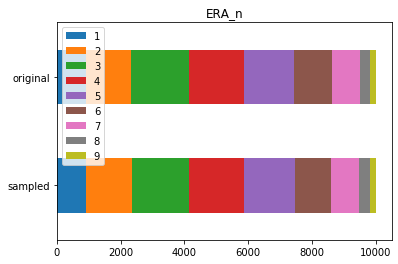

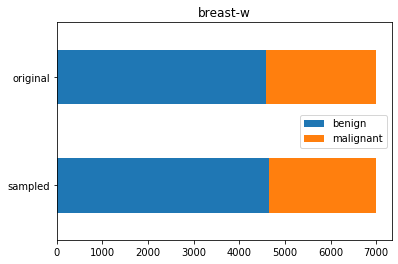

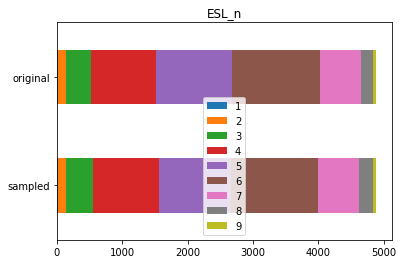

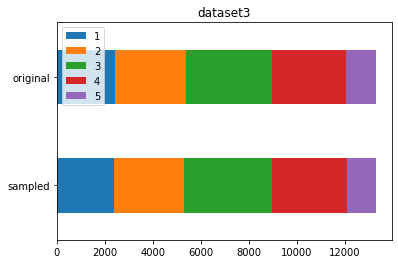

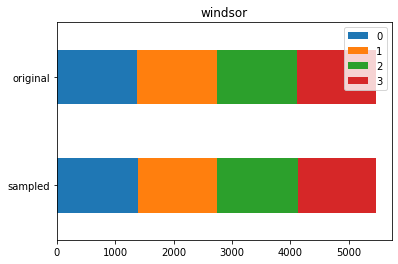

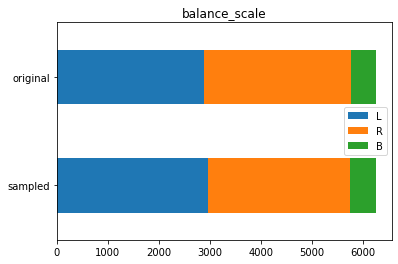

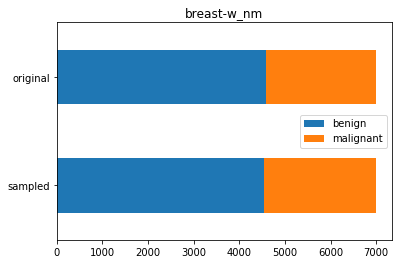

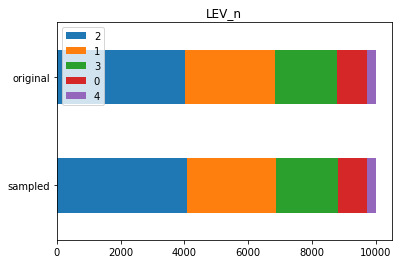

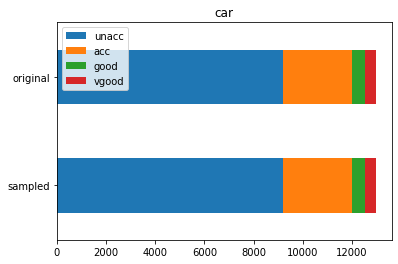

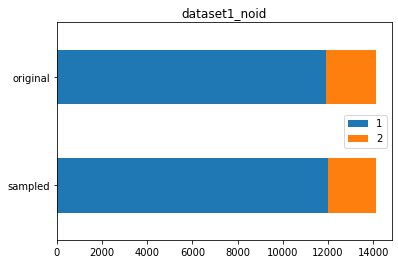

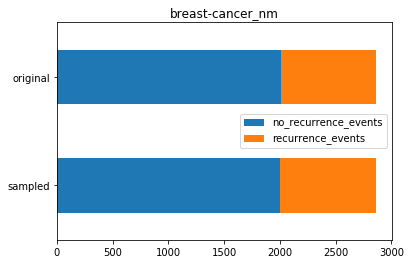

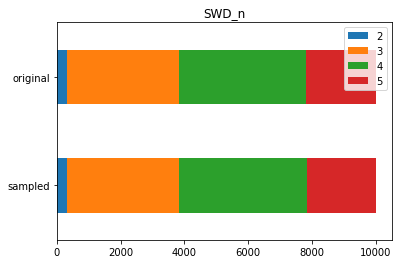

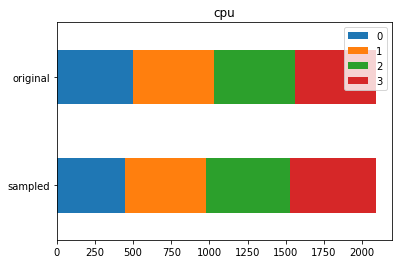

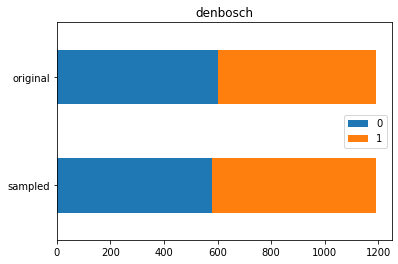

In [55]:
%matplotlib inline
for name, df in samples_by_dataset.items():
    print_distribution(name, df)

# Weights set according to class size
Each example's weight is set to ```min_class_size / current_example_class_size```

Bootstrap size equal to dataset size.

In [56]:
balanced_sampling_dir = os.path.join('..', 'results', 'balanced_sampling')
balanced_samples_by_dataset = dict()
for file in os.listdir(balanced_sampling_dir):
    path = os.path.join(balanced_sampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    balanced_samples_by_dataset[name] = df

housing {3: 1346, 4: 1265, 2: 1228, 1: 1221} Total across samples: 5060 Total in dataset: 506 Ratio: 10/10
ERA_n {4: 1121, 1: 1138, 8: 1097, 5: 1054, 9: 1131, 6: 1105, 3: 1119, 2: 1123, 7: 1112} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
breast-w {'malignant': 3515, 'benign': 3475} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
ESL_n {7: 574, 8: 572, 4: 508, 3: 553, 9: 504, 6: 527, 5: 575, 1: 516, 2: 551} Total across samples: 4880 Total in dataset: 488 Ratio: 10/10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



dataset3 {1: 2675, 5: 2616, 3: 2665, 4: 2649, 2: 2675} Total across samples: 13280 Total in dataset: 1328 Ratio: 10/10
windsor {0: 1420, 1: 1321, 3: 1346, 2: 1373} Total across samples: 5460 Total in dataset: 546 Ratio: 10/10
balance_scale {'L': 2062, 'R': 2071, 'B': 2117} Total across samples: 6250 Total in dataset: 625 Ratio: 10/10
breast-w_nm {'malignant': 3559, 'benign': 3431} Total across samples: 6990 Total in dataset: 699 Ratio: 10/10
LEV_n {1: 1996, 4: 2029, 0: 2047, 2: 1999, 3: 1929} Total across samples: 10000 Total in dataset: 1000 Ratio: 10/10
car {'good': 3213, 'vgood': 3208, 'unacc': 3257, 'acc': 3282} Total across samples: 12960 Total in dataset: 1296 Ratio: 10/10
dataset1_noid {2: 7084, 1: 7026} Total across samples: 14110 Total in dataset: 1411 Ratio: 10/10
breast-cancer_nm {'no_recurrence_events': 1427, 'recurrence_events': 1433} Total across samples: 2860 Total in dataset: 286 Ratio: 10/10
SWD_n {4: 2541, 2: 2546, 3: 2472, 5: 2441} Total across samples: 10000 Total i

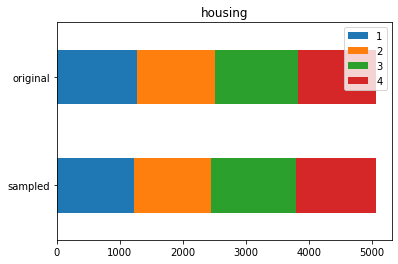

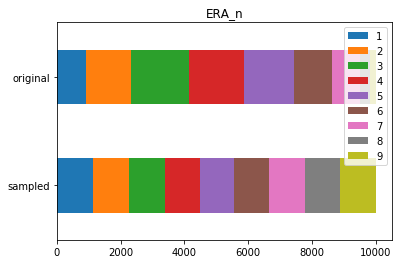

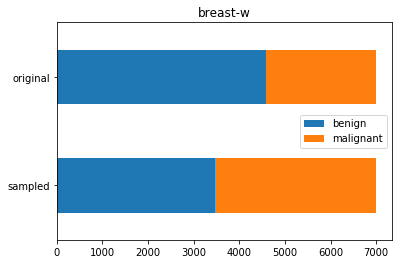

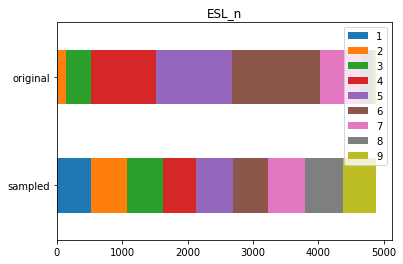

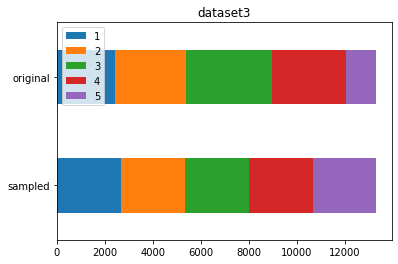

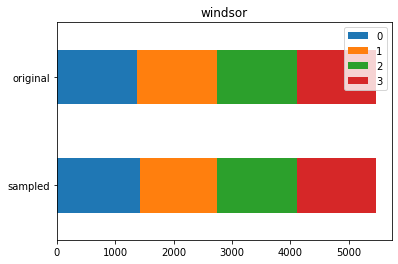

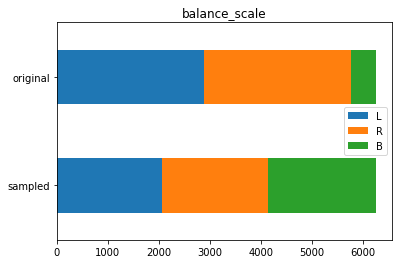

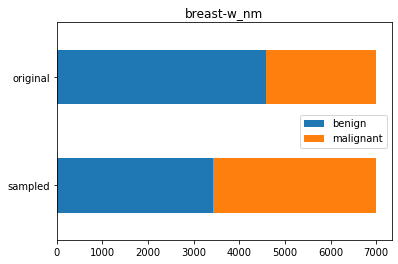

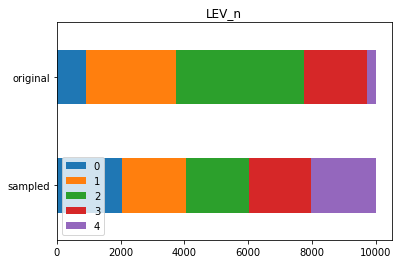

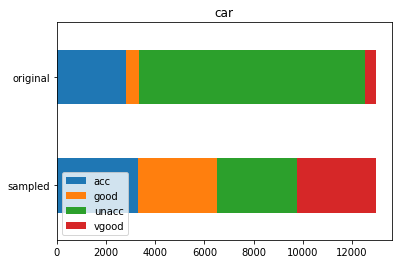

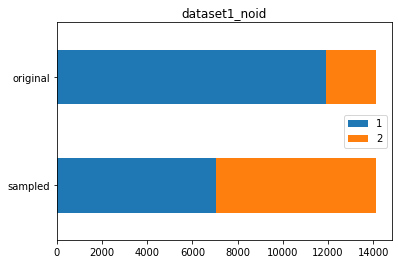

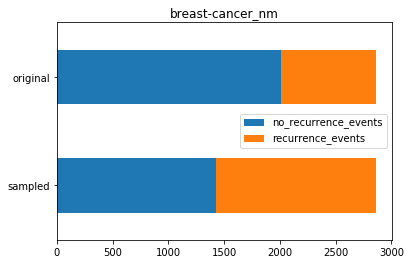

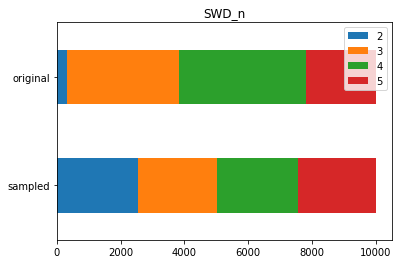

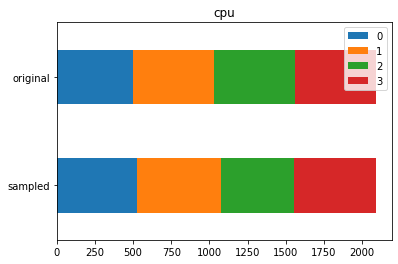

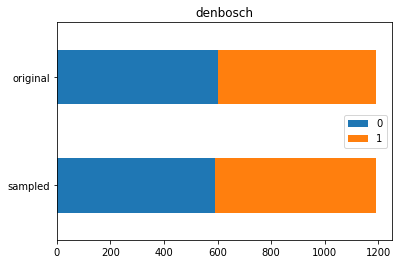

In [57]:
%matplotlib inline
for name, df in balanced_samples_by_dataset.items():
    print_distribution(name, df)

# Reduced bootstrap size
Weights are set as above. Bootstrap size equal to ```min_class_size * number_of_classes```

In [58]:
balanced_undersampling_dir = os.path.join('..', 'results', 'balanced_undersampling')
balanced_under_samples_by_dataset = dict()
for file in os.listdir(balanced_undersampling_dir):
    path = os.path.join(balanced_undersampling_dir, file)
    df = pd.read_csv(path, header=None)
    name = file.replace('.csv', '')
    balanced_under_samples_by_dataset[name] = df

housing {2: 1268, 1: 1262, 3: 1221, 4: 1209} Total across samples: 4960 Total in dataset: 506 Ratio: 10/10
ERA_n {5: 188, 8: 180, 4: 187, 3: 172, 6: 189, 9: 174, 7: 177, 2: 171, 1: 182} Total across samples: 1620 Total in dataset: 1000 Ratio: 2/10
breast-w {'malignant': 2416, 'benign': 2404} Total across samples: 4820 Total in dataset: 699 Ratio: 7/10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



ESL_n {7: 27, 4: 23, 9: 15, 8: 15, 3: 17, 6: 28, 2: 10, 1: 20, 5: 25} Total across samples: 180 Total in dataset: 488 Ratio: 0/10
dataset3 {1: 1320, 2: 1236, 4: 1233, 3: 1237, 5: 1174} Total across samples: 6200 Total in dataset: 1328 Ratio: 5/10
windsor {1: 1376, 2: 1318, 3: 1335, 0: 1371} Total across samples: 5400 Total in dataset: 546 Ratio: 10/10
balance_scale {'B': 483, 'L': 499, 'R': 488} Total across samples: 1470 Total in dataset: 625 Ratio: 2/10
breast-w_nm {'benign': 2416, 'malignant': 2404} Total across samples: 4820 Total in dataset: 699 Ratio: 7/10
LEV_n {2: 290, 0: 267, 3: 253, 4: 262, 1: 278} Total across samples: 1350 Total in dataset: 1000 Ratio: 1/10
car {'acc': 455, 'unacc': 492, 'vgood': 439, 'good': 414} Total across samples: 1800 Total in dataset: 1296 Ratio: 1/10
dataset1_noid {1: 2190, 2: 2170} Total across samples: 4360 Total in dataset: 1411 Ratio: 3/10
breast-cancer_nm {'recurrence_events': 892, 'no_recurrence_events': 808} Total across samples: 1700 Total i

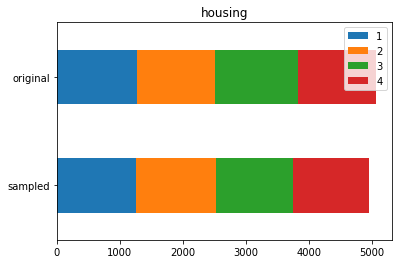

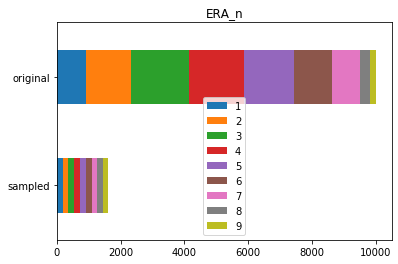

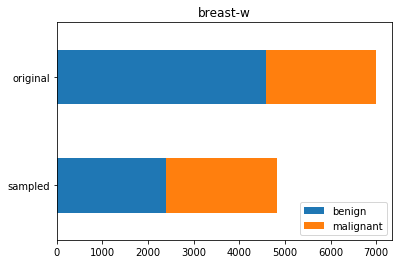

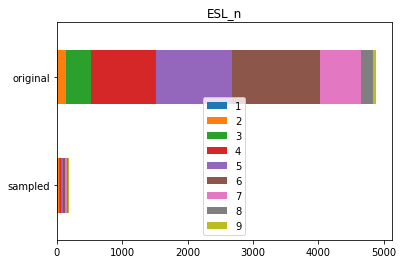

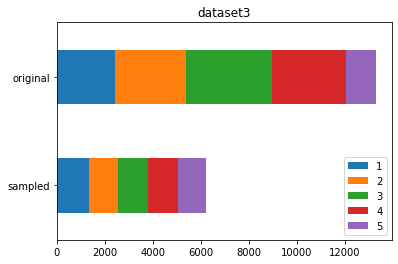

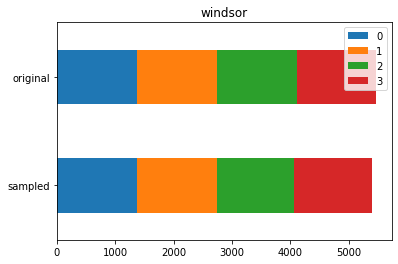

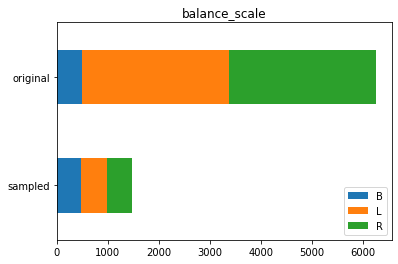

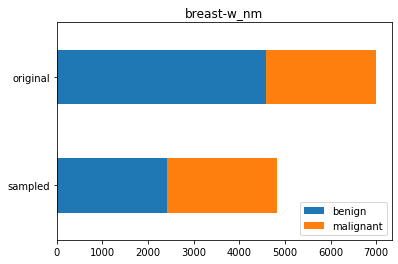

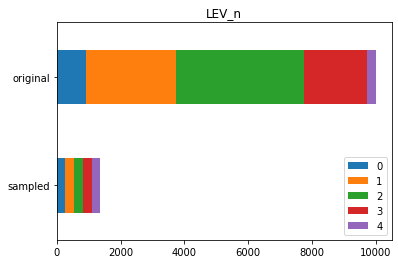

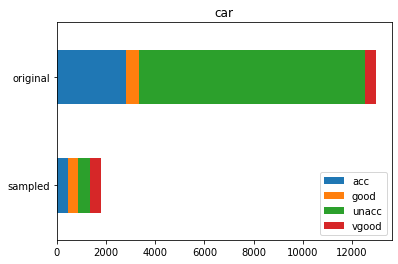

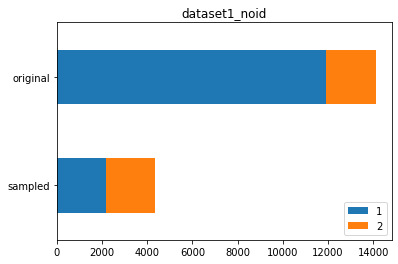

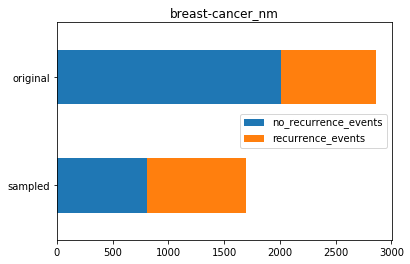

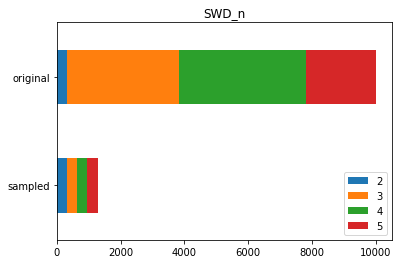

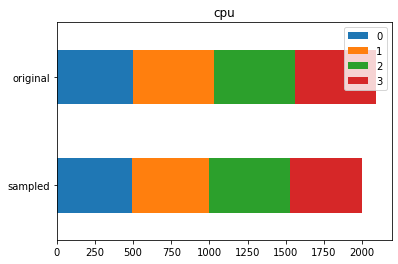

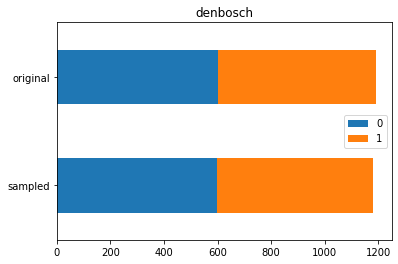

In [59]:
%matplotlib inline
for name, df in balanced_under_samples_by_dataset.items():
    print_distribution(name, df)

# Bootstrap check
Unique examples should constitute for around ```63%```.

### Test setup
Sample data below contains 10 examples from ```0``` class and 10 examples from ```1``` class (column ```2```). Index is fixed to include duplicate values. In both classes, 3 indices are duplicated. The ratio of unique examples to distinct examples number should therefore be equal to ```8/14``` ~ ```0.57```

In [60]:
def check(sample):
    counts = sample.groupby(sample.index).count()[0]
    return len(counts[counts == 1]) / len(counts)


def check_per_class(sample):
    counts = sample.groupby([sample.columns[-1], sample.index]).count()[0]
    return len(counts[counts == 1])/ len(counts)


data = pd.DataFrame({
    0: [1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1],
    1: [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2],
    2: [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
}, index=[1,2,3,4,5,6,7,1,2,3,8,9,10,11,12,13,14,8,9,10])

print(check(data))
print(check_per_class(data))

0.5714285714285714
0.5714285714285714


In [61]:
def run_check_for_dataset(name, samples):
    dataset = pd.read_csv(os.path.join(data_dir, '{}.csv'.format(name)), header=None)
    ratios = []
    for index, row in samples.iterrows():
        indices = row.values.tolist()
        sample = dataset.iloc[indices]
        ratios.append(check(sample))
    avg_ratio = sum(ratios) / len(ratios)
    print('{}, size: {}, avg ratio: {}'.format(name, dataset.shape[0], avg_ratio))
    for ratio in ratios:
        print(ratio)
    print()

### Check baseline first: samples the size of dataset, all weights set to 1.0

In [62]:
for name, data in samples_by_dataset.items():
    run_check_for_dataset(name, data)

housing, size: 506, avg ratio: 0.5825081516421079
0.546031746031746
0.5797546012269938
0.5454545454545454
0.6377245508982036
0.5895061728395061
0.60790273556231
0.5910543130990416
0.5789473684210527
0.559748427672956
0.588957055214724

ERA_n, size: 1000, avg ratio: 0.5891778575695497
0.5859872611464968
0.5725677830940988
0.5865834633385335
0.5978090766823161
0.5873015873015873
0.5629984051036683
0.5949764521193093
0.5903426791277259
0.6003086419753086
0.6129032258064516

breast-w, size: 699, avg ratio: 0.5824421280056796
0.6035634743875279
0.5687645687645687
0.5402298850574713
0.6206140350877193
0.5655172413793104
0.6027088036117382
0.5787037037037037
0.6004415011037527
0.5626423690205011
0.5812356979405034

ESL_n, size: 488, avg ratio: 0.5762481508594506
0.5816993464052288
0.5897435897435898
0.5657894736842105
0.5833333333333334
0.5574324324324325
0.5878594249201278
0.5457627118644067
0.5700325732899023
0.5814696485623003
0.5993589743589743

dataset3, size: 1328, avg ratio: 0.57670216

### Check weighted sampling (sample size equal to dataset size)

In [63]:
for name, data in balanced_samples_by_dataset.items():
    run_check_for_dataset(name, data)

housing, size: 506, avg ratio: 0.5823484911352185
0.5975232198142415
0.56875
0.6012658227848101
0.5927051671732523
0.5718849840255591
0.5830721003134797
0.5736677115987461
0.5896656534954408
0.5869565217391305
0.5579937304075235

ERA_n, size: 1000, avg ratio: 0.5905480073944073
0.612736660929432
0.5678119349005425
0.6056338028169014
0.5901926444833625
0.5912280701754385
0.6162988115449916
0.5698924731182796
0.5752688172043011
0.6024096385542169
0.5740072202166066

breast-w, size: 699, avg ratio: 0.5639821604792881
0.5734597156398105
0.5428571428571428
0.5707762557077626
0.5741176470588235
0.5751173708920188
0.5664335664335665
0.5357142857142857
0.5531914893617021
0.5844748858447488
0.5636792452830188

ESL_n, size: 488, avg ratio: 0.6157774970216903
0.6176470588235294
0.6042553191489362
0.6762295081967213
0.6042553191489362
0.625531914893617
0.6497890295358649
0.5966386554621849
0.6036036036036037
0.5789473684210527
0.6008771929824561

dataset3, size: 1328, avg ratio: 0.5746566638366394

### Check weighted undersampling (reduced sample size)

In [64]:
for name, data in balanced_under_samples_by_dataset.items():
    run_check_for_dataset(name, data)

housing, size: 506, avg ratio: 0.5988841895905483
0.5873015873015873
0.5704918032786885
0.590625
0.6070287539936102
0.6012461059190031
0.6160990712074303
0.6037151702786377
0.6435045317220544
0.59375
0.5750798722044729

ERA_n, size: 1000, avg ratio: 0.8900864043769342
0.8811188811188811
0.9027777777777778
0.903448275862069
0.8972602739726028
0.9121621621621622
0.8518518518518519
0.9020979020979021
0.851063829787234
0.9328859060402684
0.8661971830985915

breast-w, size: 699, avg ratio: 0.6773889338161677
0.6902654867256637
0.6811594202898551
0.6273291925465838
0.6783625730994152
0.6430678466076696
0.6832844574780058
0.6873156342182891
0.7669376693766937
0.6831395348837209
0.6330275229357798

ESL_n, size: 488, avg ratio: 0.9498529411764707
1.0
1.0
0.9411764705882353
1.0
0.9411764705882353
1.0
1.0
0.9411764705882353
0.875
0.8

dataset3, size: 1328, avg ratio: 0.7799847003545678
0.7870182555780934
0.8080808080808081
0.762396694214876
0.7983870967741935
0.7842323651452282
0.7661795407098121